In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-price/GOOG.csv


In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [42]:
df = pd.read_csv('/kaggle/input/google-stock-price/GOOG.csv', header = 0)

In [43]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [44]:
df.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     2004-08-19    2.490664    2.591785    2.390042    2.499133    2.499133   
1     2004-08-20    2.515820    2.716817    2.503118    2.697639    2.697639   
2     2004-08-23    2.758411    2.826406    2.716070    2.724787    2.724787   
3     2004-08-24    2.770615    2.779581    2.579581    2.611960    2.611960   
4     2004-08-25    2.614201    2.689918    2.587302    2.640104    2.640104   
...          ...         ...         ...         ...         ...         ...   
4853  2023-11-29  138.985001  139.669998  136.294998  136.399994  136.399994   
4854  2023-11-30  136.399994  136.960007  132.789993  133.919998  133.919998   
4855  2023-12-01  133.320007  133.500000  132.151993  133.320007  133.320007   
4856  2023-12-04  131.294006  131.449997  129.399994  130.630005  130.630005   
4857  2023-12-05  130.369995  133.539993  129.729996  132.389999  132.389999   

     

In [45]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [46]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

object


In [47]:
df = df.set_index("Date")

/opt/conda/lib/python3.10/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [48]:
google_data = df.asfreq('b')

In [49]:
google_data.isnull().sum()

Open         176
High         176
Low          176
Close        176
Adj Close    176
Volume       176
dtype: int64

In [50]:
null_data = google_data[google_data. isnull().any(axis=1) ]
null_data.head()
null_dates = null_data.index.tolist()

In [51]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2005-03-25 00:00:00'), Timestamp('2006-04-14 00:00:00'), Timestamp('2007-01-02 00:00:00'), Timestamp('2007-04-06 00:00:00'), Timestamp('2008-03-21 00:00:00'), Timestamp('2009-04-10 00:00:00'), Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00'), Timestamp('2017-04-14 00:00:00'), Timestamp('2018-03-30 00:00:00'), Timestamp('2018-12-05 00:00:00'), Timestamp('2019-04-19 00:00:00'), Timestamp('2020-04-10 00:00:00'), Timestamp('2021-04-02 00:00:00'), Timestamp('2022-04-15 00:00:00'), Timestamp('2022-06-20 00:00:00'), Timestamp('2023-04-07 00:00:00'), Timestamp('2023-06-19 00:00:00')]


In [52]:
print(google_data.shape)
modified_df = google_data.drop(holidays)
print(modified_df.shape)

(5034, 6)
(4876, 6)


In [53]:
print("Before filling missing values:\n", modified_df.isna().sum())
modified_df = modified_df.bfill(axis ='rows')
print("\nAfter filling missing values:\n",modified_df.isna().sum())

Before filling missing values:
 Open         18
High         18
Low          18
Close        18
Adj Close    18
Volume       18
dtype: int64

After filling missing values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


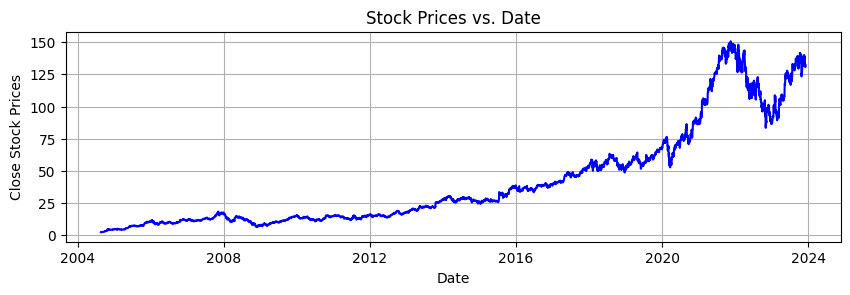

In [54]:
import matplotlib.pyplot as plt

def plotter():
    global closing_stock
    # Extracting the 'Close' prices from the modified DataFrame
    company_close = modified_df['Close'].values.astype('float32')
    closing_stock = company_close.reshape(-1, 1)  # Store for potential further use

    plt.figure(figsize=(10, 6))
    plt.subplot(211)
    plt.plot(modified_df.index, company_close, 'b')  # Use the Date index for x-axis
    plt.xlabel('Date')
    plt.ylabel("Close Stock Prices")
    plt.title('Stock Prices vs. Date')
    plt.grid(True)
    plt.show()

# Call the function
plotter()

In [55]:
n_train = int(len(closing_stock) * 0.70)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

Train samples: 3413 Validation Samples: 731 Test Samples: 732


In [56]:
train_data = closing_stock[0:n_train]
print(train_data.shape)

(3413, 1)


In [57]:

val_data = closing_stock[n_train:n_train+n_val]
print(val_data.shape)

(731, 1)


In [58]:
test_data = closing_stock[n_train+n_val:]
print(test_data.shape)

(732, 1)


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0, 1))

In [60]:
train = scaler.fit_transform(train_data)

In [61]:
val = scaler.fit_transform(val_data)

In [62]:
test = scaler.fit_transform(test_data)

In [63]:
sequence_length = 100

# Redefining the create_dataset function to accommodate the new sequence length
def create_dataset(data, n_features, sequence_length):
    dataX, dataY = [], []
    for i in range(len(data) - sequence_length):
        dataX.append(data[i:(i + sequence_length), 0])
        dataY.append(data[i + sequence_length, 0])
    return np.array(dataX), np.array(dataY)


In [64]:
n_features = 1  
trainX, trainY = create_dataset(train, n_features, sequence_length)
valX, valY = create_dataset(val, n_features, sequence_length)
testX, testY = create_dataset(test, n_features, sequence_length)

In [65]:
trainX = trainX.reshape((trainX.shape[0], sequence_length, n_features))
valX = valX.reshape((valX.shape[0], sequence_length, n_features))
testX = testX.reshape((testX.shape[0], sequence_length, n_features))


In [66]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(3313, 100, 1) (3313,) (631, 100, 1) (631,) (632, 100, 1) (632,)


TCN 

In [ ]:
from tensorflow.keras import layers  # Import layers from Keras
from tensorflow.keras.layers import Conv1D, BatchNormalization, Add, Activation, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def TCN_block(inputs, filters, kernel_size, dilation_rate):
    x = Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    residual = Conv1D(filters, 1, padding='same')(inputs)
    x = Add()([x, residual])
    x = Activation('relu')(x)
    return x

inputs = layers.Input(shape=(sequence_length, n_features))
x = TCN_block(inputs, filters=128, kernel_size=2, dilation_rate=1)
x = TCN_block(x, filters=128, kernel_size=2, dilation_rate=4)
x = TCN_block(x, filters=128, kernel_size=2, dilation_rate=8)
x = layers.Flatten()(x)
output = layers.Dense(1, activation='linear')(x)
model = Model(inputs, output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

print(model.summary())


history = model.fit(trainX,trainY,epochs=500,batch_size=128, verbose=1, validation_data = (valX,valY))

In [68]:
import math

def model_score(model, X_train, y_train, X_val, y_val, X_test, y_test):
    print('For TCN')
    
    # Train Score
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f}, RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))
    
    # Validation Score
    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f}, RMSE: {:.2f}".format(val_score[0], math.sqrt(val_score[0])))
    
    # Test Score
    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)  # Use X_test directly without reshaping
    print("MSE: {:.5f}, RMSE: {:.2f}".format(test_score[0], math.sqrt(test_score[0])))
model_score(model, trainX, trainY, valX, valY, testX, testY)

For TCN
Train Score:
MSE: 0.00030, RMSE: 0.02
Validation Score:
MSE: 0.00361, RMSE: 0.06
Test Score:
MSE: 0.00562, RMSE: 0.07


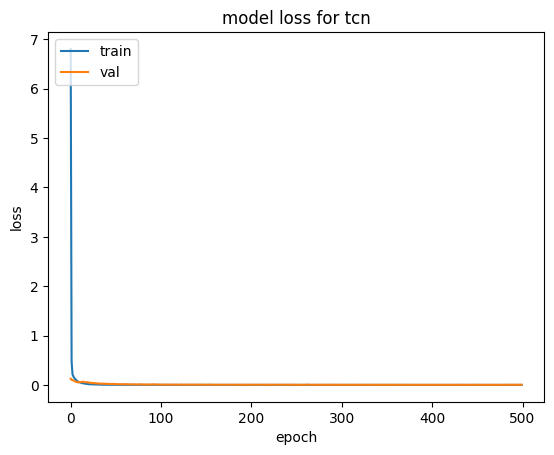

In [69]:
plt.plot(history.history['loss'])  # plotting train loss
plt.plot(history.history['val_loss'])  # plotting validation loss

plt.title('model loss for tcn')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

with tcn
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
[[118.36037 ]
 [118.85985 ]
 [119.665794]
 [120.07815 ]
 [120.74222 ]
 [121.03185 ]
 [121.126   ]
 [121.4615  ]
 [121.3262  ]
 [121.733734]]
[[124.57    ]
 [126.08    ]
 [125.6965  ]
 [126.352   ]
 [126.033005]
 [125.6965  ]
 [126.371   ]
 [125.5675  ]
 [126.455   ]
 [126.9995  ]]


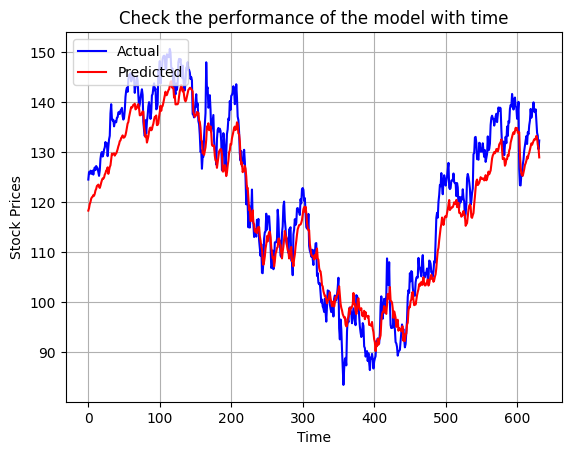

In [70]:
# Predict using the model without reshaping testX

print('with tcn')
pred = model.predict(testX)

# Inverse transform the predictions to get them back to the original scale
pred = scaler.inverse_transform(pred)
print(pred[:10])

# Reshape testY for inverse transformation
testY_actual = testY.reshape(-1, 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

# Plot the actual vs predicted values
plt.plot(testY_actual, 'b')
plt.plot(pred, 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()

transformer

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dense, Input, Dropout

def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0.2):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

inputs = Input(shape=(sequence_length, n_features))
x = transformer_block(inputs, head_size=128, num_heads=4, ff_dim=64)
x = transformer_block(x, head_size=128, num_heads=4, ff_dim=64)
x = layers.Flatten()(x)
x = Dense(1, activation="linear")(x)

model = Model(inputs, x)
model.compile(optimizer=Adam(learning_rate=0.0005), loss="mean_squared_error", metrics=["mean_squared_error"])

print(model.summary())


history = model.fit(trainX,trainY,epochs=500,batch_size=128, verbose=1, validation_data = (valX,valY))

In [72]:
import math

def model_score(model, X_train, y_train, X_val, y_val, X_test, y_test):
    print('For Transformers')
    
    # Train Score
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f}, RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))
    
    # Validation Score
    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f}, RMSE: {:.2f}".format(val_score[0], math.sqrt(val_score[0])))
    
    # Test Score
    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)  # Use X_test directly without reshaping
    print("MSE: {:.5f}, RMSE: {:.2f}".format(test_score[0], math.sqrt(test_score[0])))
model_score(model, trainX, trainY, valX, valY, testX, testY)

For Transformers
Train Score:


I0000 00:00:1730754485.786848   40675 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_441', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1730754490.676072   40685 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_441', 228 bytes spill stores, 228 bytes spill loads



MSE: 0.00009, RMSE: 0.01
Validation Score:


I0000 00:00:1730754495.397498   40701 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_441', 228 bytes spill stores, 228 bytes spill loads



MSE: 0.00192, RMSE: 0.04
Test Score:


I0000 00:00:1730754500.186435   40718 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_441', 228 bytes spill stores, 228 bytes spill loads



MSE: 0.00323, RMSE: 0.06


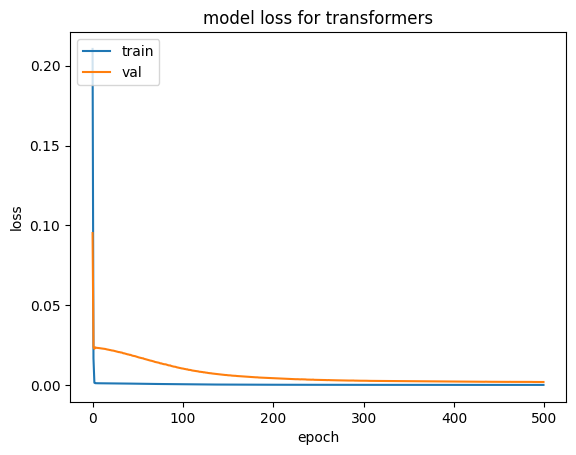

In [73]:
plt.plot(history.history['loss'])  # plotting train loss
plt.plot(history.history['val_loss'])  # plotting validation loss

plt.title('model loss for transformers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

with transformers
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step 
[[126.87395 ]
 [123.10319 ]
 [125.7762  ]
 [122.056694]
 [122.093056]
 [123.51723 ]
 [127.14726 ]
 [127.90871 ]
 [128.82837 ]
 [128.53424 ]]
[[124.57    ]
 [126.08    ]
 [125.6965  ]
 [126.352   ]
 [126.033005]
 [125.6965  ]
 [126.371   ]
 [125.5675  ]
 [126.455   ]
 [126.9995  ]]


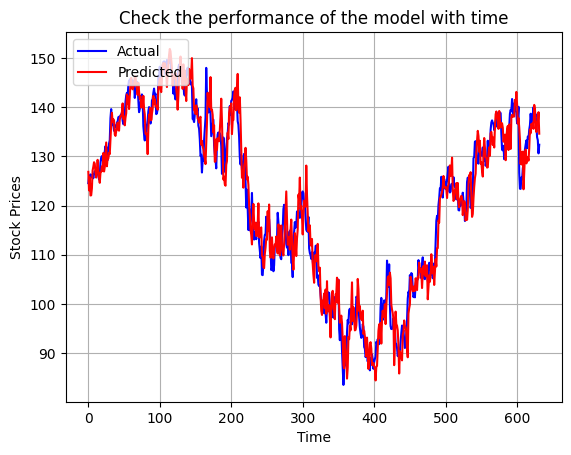

In [74]:
# Predict using the model without reshaping testX

print('with transformers')
pred = model.predict(testX)

# Inverse transform the predictions to get them back to the original scale
pred = scaler.inverse_transform(pred)
print(pred[:10])

# Reshape testY for inverse transformation
testY_actual = testY.reshape(-1, 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

# Plot the actual vs predicted values
plt.plot(testY_actual, 'b')
plt.plot(pred, 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()

LSTM

In [ ]:
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import LSTM
import keras
model = keras.Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, n_features), activation='tanh'))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(LSTM(150, return_sequences=True, activation='tanh'))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mean_squared_error'])

print(model.summary())


history = model.fit(trainX,trainY,epochs=500,batch_size=128, verbose=1, validation_data = (valX,valY))

In [76]:
import math

def model_score(model, X_train, y_train, X_val, y_val, X_test, y_test):
    print('For lstm')
    
    # Train Score
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f}, RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))
    
    # Validation Score
    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f}, RMSE: {:.2f}".format(val_score[0], math.sqrt(val_score[0])))
    
    # Test Score
    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)  # Use X_test directly without reshaping
    print("MSE: {:.5f}, RMSE: {:.2f}".format(test_score[0], math.sqrt(test_score[0])))
model_score(model, trainX, trainY, valX, valY, testX, testY)

For lstm
Train Score:
MSE: 0.00022, RMSE: 0.01
Validation Score:
MSE: 0.00134, RMSE: 0.04
Test Score:
MSE: 0.00226, RMSE: 0.05


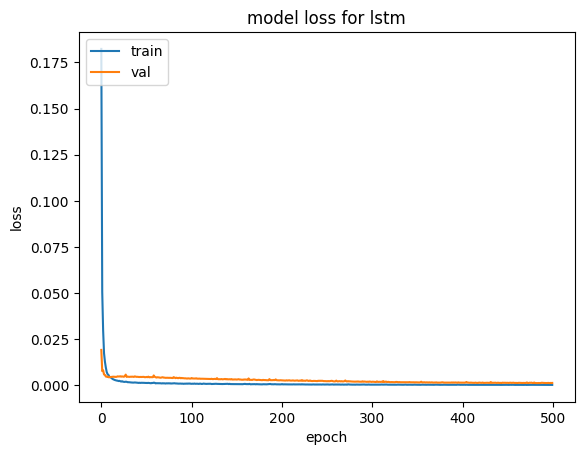

In [77]:
plt.plot(history.history['loss'])  # plotting train loss
plt.plot(history.history['val_loss'])  # plotting validation loss

plt.title('model loss for lstm')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

with lstms
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
[[124.012115]
 [124.85718 ]
 [125.964836]
 [126.47249 ]
 [126.89748 ]
 [126.9442  ]
 [126.722275]
 [126.79699 ]
 [126.57381 ]
 [126.77454 ]]
[[124.57    ]
 [126.08    ]
 [125.6965  ]
 [126.352   ]
 [126.033005]
 [125.6965  ]
 [126.371   ]
 [125.5675  ]
 [126.455   ]
 [126.9995  ]]


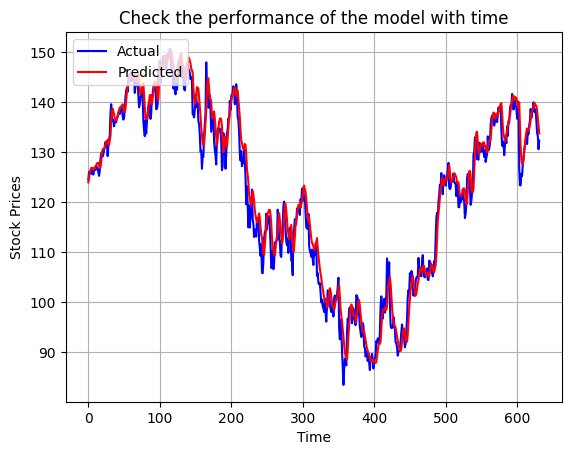

In [78]:
# Predict using the model without reshaping testX
print('with lstms')
pred = model.predict(testX)

# Inverse transform the predictions to get them back to the original scale
pred = scaler.inverse_transform(pred)
print(pred[:10])

# Reshape testY for inverse transformation
testY_actual = testY.reshape(-1, 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

# Plot the actual vs predicted values
plt.plot(testY_actual, 'b')
plt.plot(pred, 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()